In [19]:
import matplotlib.pyplot as plt
import collections
import numpy as np
import tensorflow as tf

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout , Activation ,Flatten

# need to install np_utils first
from keras.utils import np_utils
from keras import backend as K

In [20]:
(X_train, y_train), (X_test , y_test) = cifar10.load_data()

In [21]:
print("X train shape = " , X_train.shape)
print("X test shape = " , X_test.shape)
print("y train shape = " , y_train.shape)
print("y test shape = " , y_test.shape)

X train shape =  (50000, 32, 32, 3)
X test shape =  (10000, 32, 32, 3)
y train shape =  (50000, 1)
y test shape =  (10000, 1)


<h3> Data Pre-Processing </h3>

In [22]:
# Reshaping
X_train  = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train.shape , X_test.shape

((50000, 3072), (10000, 3072))

In [23]:
#Normalizing pixel values
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train/ 255.
X_test = X_test/ 255.

In [24]:
# Using one hot encoder to convert class to a number
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [25]:
# check sample
print("Training Sample 15 : " , X_train[14])
print("Training sample shape : " , X_train[14].shape)

print("Training Label 15 : " , y_train[14])
print("Training Label shape : " , y_train[14].shape)

Training Sample 15 :  [0.39215687 0.57254905 0.7529412  ... 0.6117647  0.5882353  0.5372549 ]
Training sample shape :  (3072,)
Training Label 15 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Training Label shape :  (10,)


<h3>Creating a neural network</h3>

In [26]:
model = Sequential()
model.add(Dense(10, input_shape = (3072, ), activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))

In [27]:
model.compile(loss = "categorical_crossentropy" , optimizer = "adam", metrics = ["accuracy"])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30730     
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 50)                1050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 32,510
Trainable params: 32,510
Non-trainable params: 0
_________________________________________________________________


<h3>Training and testing the model</h3>

In [29]:
batch_size = 128
epochs = 50

In [30]:
hist = model.fit(X_train , y_train , batch_size = batch_size ,
                    epochs = epochs, verbose = 1, validation_data = (X_test , y_test))

Epoch 1/50
391/391 [==============================] - 14s 22ms/step - loss: 2.1132 - accuracy: 0.1717 - val_loss: 2.0533 - val_accuracy: 0.1917
Epoch 2/50
391/391 [==============================] - 7s 18ms/step - loss: 2.0509 - accuracy: 0.1936 - val_loss: 2.0505 - val_accuracy: 0.1965
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0396 - accuracy: 0.1958 - val_loss: 2.0300 - val_accuracy: 0.1895
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0355 - accuracy: 0.2004 - val_loss: 2.0308 - val_accuracy: 0.2000
Epoch 5/50
391/391 [==============================] - 7s 19ms/step - loss: 2.0337 - accuracy: 0.2000 - val_loss: 2.0232 - val_accuracy: 0.2007
Epoch 6/50
391/391 [==============================] - 7s 17ms/step - loss: 2.0308 - accuracy: 0.2006 - val_loss: 2.0258 - val_accuracy: 0.2042
Epoch 7/50
391/391 [==============================] - 7s 18ms/step - loss: 2.0290 - accuracy: 0.2019 - val_loss: 2.0271 - val_accuracy: 0.202

<h3>Visualizing loss and accuracy</h3>

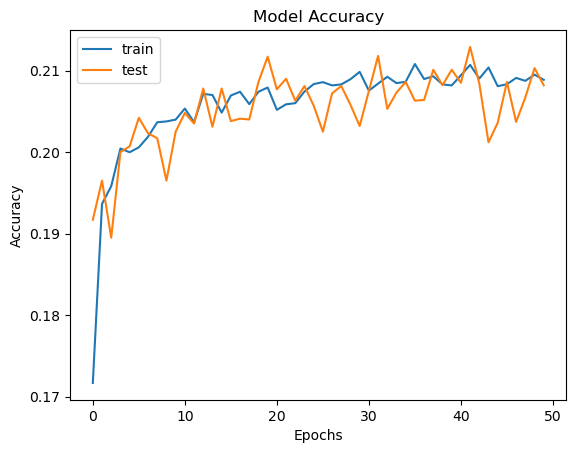

In [31]:
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

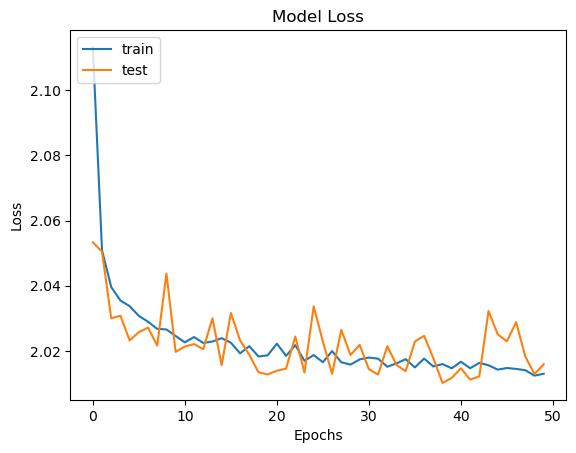

In [32]:
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
pred = model.predict(X_test)
print(pred)

313/313 [==============================] - 4s 12ms/step
[[0.06117531 0.07535058 0.12091821 ... 0.13416111 0.03416113 0.0563792 ]
 [0.24562506 0.14421946 0.04906047 ... 0.00984449 0.373951   0.13383037]
 [0.26818672 0.13154662 0.05195538 ... 0.0080792  0.3854835  0.11264105]
 ...
 [0.02198631 0.02362152 0.14962824 ... 0.13558836 0.00799105 0.01803317]
 [0.03447516 0.04065559 0.13639939 ... 0.14340514 0.01560244 0.03024906]
 [0.04322982 0.05273182 0.13045901 ... 0.14227875 0.02121048 0.03894497]]


In [34]:
#convert prediction classes to one hot encoder
pred_classes = np.argmax(pred, axis=1)
# convert testing observations to one hot vectors
y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, pred_classes)

<Axes: >

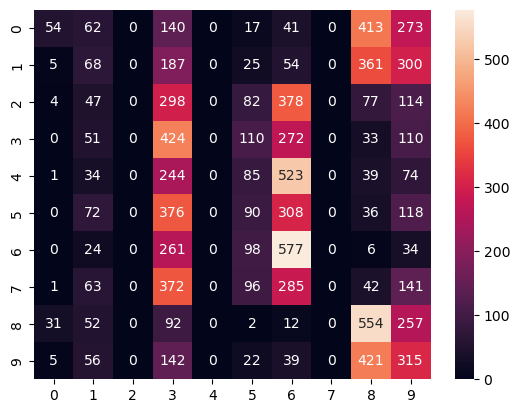

In [36]:
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, fmt='g')